In [1]:
# !pip install scikit-learn
# !pip install pandas
# !pip install emoji
# !pip install num2words
# !pip install nltk
# !pip install matplotlib
# !pip install wordcloud

In [2]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import emoji
from num2words import num2words
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
#nltk.download('stopwords')
#nltk.download('wordnet')
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter
from matplotlib import colors
from wordcloud import WordCloud
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
#!pip install ipynb 
from ipynb.fs.full.preprocessor_class import Preprocessor

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Andreea\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Andreea\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
train_data = pd.read_csv('data/shuffled_train_data.csv',index_col=None)
train_labels = pd.read_csv('data/shuffled_train_labels.csv',index_col=None)

test_data = pd.read_csv('data/test_data.csv',index_col=None)
test_labels = pd.read_csv('data/test_labels.csv',index_col=None)

train_data_plot = pd.read_csv('data/train_data_plot.csv',index_col=None)
test_data_plot = pd.read_csv('data/test_data_plot.csv',index_col=None)

train_data.shape

(45000, 1)

In [5]:
preprocessor = Preprocessor(set(stopwords.words('english')), WordNetLemmatizer(), PorterStemmer(), True, True, True, True, True, False, True, True, True, False)

preprocessed_data_train = pd.DataFrame(columns=['text'])
preprocessed_data_test = pd.DataFrame(columns=['text'])

preprocessed_data_train['text'] = train_data.apply(lambda row: preprocessor.preprocess(row.iloc[0]), axis = 1)

preprocessed_data_test['text'] = test_data.apply(lambda row: preprocessor.preprocess(row.iloc[0]), axis = 1)

In [6]:
preprocessed_data_train

,text
0,"[love, super, comfortable]"
1,"[shave, cremes, need, lather, feeling, fullnes..."
2,"[love, bright, color, dress, fabric, nice, fee..."
3,"[see, small, got, curve, get, fit, like, size]"
4,"[sister, love, wolf, go, wrong, cute, comfy, w..."
...,...
44995,"[sandal, poorly, constructed, base, shoe, fitt..."
44996,"[wow, shirt, comfortable, fit, hug, body, soft..."
44997,"[problem, heel, pain, pf, looking, good, walki..."
44998,"[keep, spotting, hand, everything, blue, ink, ..."


In [7]:
preprocessed_data_test

,text
0,"[poorly, made, shrink, fit, well]"
1,"[playing, santa, year, authentic, high, qualit..."
2,"[bought, two, one, better, shipping, schedule,..."
3,"[came, box, scratch, one, lense, know, inexpen..."
4,"[okay, kind, hard, explain, really, liked, ski..."
...,...
5995,"[christmas, gift, boyfriend, nice, wallet, app..."
5996,"[better, expected, pleasantly, surprised]"
5997,"[skirt, awsome, arrived, real, quick, lb, skir..."
5998,"[excellent, piece, elegant, sturdy, design, lo..."


In [8]:
preprocessed_data_test['text'] = preprocessed_data_test['text'].apply(lambda x: ' '.join(map(str, x)))
preprocessed_data_test

,text
0,poorly made shrink fit well
1,playing santa year authentic high quality sant...
2,bought two one better shipping schedule second...
3,came box scratch one lense know inexpensive un...
4,okay kind hard explain really liked skirt know...
...,...
5995,christmas gift boyfriend nice wallet appears l...
5996,better expected pleasantly surprised
5997,skirt awsome arrived real quick lb skirt fit l...
5998,excellent piece elegant sturdy design love fac...


In [9]:
preprocessed_data_train['text'] = preprocessed_data_train['text'].apply(lambda x: ' '.join(map(str, x)))
preprocessed_data_train

,text
0,love super comfortable
1,shave cremes need lather feeling fullness rich...
2,love bright color dress fabric nice feel reall...
3,see small got curve get fit like size
4,sister love wolf go wrong cute comfy wolfie
...,...
44995,sandal poorly constructed base shoe fitting ex...
44996,wow shirt comfortable fit hug body softness fr...
44997,problem heel pain pf looking good walking shoe...
44998,keep spotting hand everything blue ink even le...


In [11]:
for max_ft in [3000, 5000]:
    for ngram_range in [(1, 1), (1, 2), (1, 3)]: 
        for neighbors in [5, 7, 9]:
            for weights in ['uniform', 'distance']:
                for metric in ['cosine', 'euclidean', 'manhattan']:
                    tfidf_vectorizer = TfidfVectorizer(ngram_range = ngram_range, max_features = max_ft)
                    train_tfidf = tfidf_vectorizer.fit_transform(preprocessed_data_train['text']) 
                    test_tfidf = tfidf_vectorizer.transform(preprocessed_data_test['text']) 

                    knn_model = KNeighborsClassifier(n_neighbors = neighbors, weights = weights, metric = metric)
                    knn_model.fit(train_tfidf, train_labels['label'])
                    predictions = knn_model.predict(test_tfidf)
                    acc = metrics.accuracy_score(test_labels['label'], predictions)
                    print("max_features", max_ft, ", ngram_range", ngram_range, ", n_neighbors", neighbors, ", weights", weights, ", metric", metric, "- accuracy =", acc)

max_features 3000 , ngram_range (1, 1) , n_neighbors 5 , weights uniform , metric cosine - accuracy = 0.5746666666666667
max_features 3000 , ngram_range (1, 1) , n_neighbors 5 , weights uniform , metric euclidean - accuracy = 0.4435
max_features 3000 , ngram_range (1, 1) , n_neighbors 5 , weights uniform , metric manhattan - accuracy = 0.3883333333333333
max_features 3000 , ngram_range (1, 1) , n_neighbors 5 , weights distance , metric cosine - accuracy = 0.5711666666666667
max_features 3000 , ngram_range (1, 1) , n_neighbors 5 , weights distance , metric euclidean - accuracy = 0.44383333333333336
max_features 3000 , ngram_range (1, 1) , n_neighbors 5 , weights distance , metric manhattan - accuracy = 0.3873333333333333
max_features 3000 , ngram_range (1, 1) , n_neighbors 7 , weights uniform , metric cosine - accuracy = 0.5875
max_features 3000 , ngram_range (1, 1) , n_neighbors 7 , weights uniform , metric euclidean - accuracy = 0.438
max_features 3000 , ngram_range (1, 1) , n_neighbo

max_features 5000 , ngram_range (1, 1) , n_neighbors 9 , weights distance , metric euclidean - accuracy = 0.47383333333333333
max_features 5000 , ngram_range (1, 1) , n_neighbors 9 , weights distance , metric manhattan - accuracy = 0.3985
max_features 5000 , ngram_range (1, 2) , n_neighbors 5 , weights uniform , metric cosine - accuracy = 0.5791666666666667
max_features 5000 , ngram_range (1, 2) , n_neighbors 5 , weights uniform , metric euclidean - accuracy = 0.44183333333333336
max_features 5000 , ngram_range (1, 2) , n_neighbors 5 , weights uniform , metric manhattan - accuracy = 0.38766666666666666
max_features 5000 , ngram_range (1, 2) , n_neighbors 5 , weights distance , metric cosine - accuracy = 0.575
max_features 5000 , ngram_range (1, 2) , n_neighbors 5 , weights distance , metric euclidean - accuracy = 0.4385
max_features 5000 , ngram_range (1, 2) , n_neighbors 5 , weights distance , metric manhattan - accuracy = 0.3873333333333333
max_features 5000 , ngram_range (1, 2) , n_

In [11]:
#max_features 5000 , ngram_range (1, 2) , n_neighbors 9 , weights uniform , metric cosine - accuracy = 0.5925
tfidf_vectorizer = TfidfVectorizer(ngram_range = (1, 2), max_features = 5000)
train_tfidf = tfidf_vectorizer.fit_transform(preprocessed_data_train['text']) 
test_tfidf = tfidf_vectorizer.transform(preprocessed_data_test['text'])
            
knn_model = KNeighborsClassifier(n_neighbors = 9, weights = "uniform", metric = "cosine")
knn_model.fit(train_tfidf, train_labels['label'])
predictions = knn_model.predict(test_tfidf)
acc = metrics.accuracy_score(test_labels['label'], predictions)

In [12]:
from sklearn.metrics import classification_report

print(classification_report(test_labels['label'], predictions))

              precision    recall  f1-score   support

    negative       0.58      0.72      0.64      2250
     neutral       0.41      0.21      0.28      1500
    positive       0.67      0.72      0.69      2250

    accuracy                           0.59      6000
   macro avg       0.55      0.55      0.54      6000
weighted avg       0.57      0.59      0.57      6000



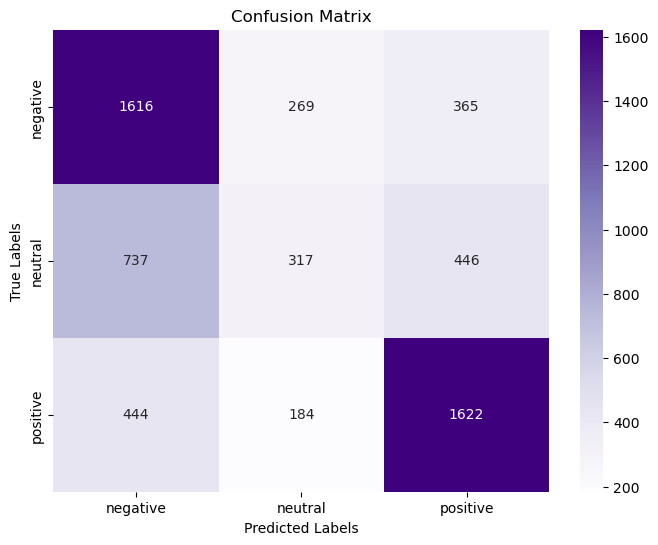

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_labels['label'], predictions)

plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Purples', xticklabels = ['negative', 'neutral', 'positive'], yticklabels = ['negative', 'neutral', 'positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()